# Import Libraries

In [4]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime

#from FuncToolbox import FuncToolbox

#For Candlestick Visualizations
from pandas_datareader import data as web
import plotly.graph_objects as go



# Functions

In [5]:
# Retrieve Timestamp given data index
def retrieve_timestamp(d1,d2):
    t1 = df_nn[df_nn.index==d1]["Timestamp"].to_string(index=False)
    t2 = df_nn[df_nn.index==d2]["Timestamp"].to_string(index=False)
    print("The range is between "+t1+" and "+t2)

# Get lastest tickers from YFINANCE

### Fetch from yfinance is limited,so we need to import an external dataset

In [6]:
BTC_Ticker = yf.Ticker("BTC-USD")
BTC_Data = BTC_Ticker.history(period="7d",interval="1m")

In [7]:
BTC_Data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-09-15 00:00:00+00:00,20242.289062,20242.289062,20242.289062,20242.289062,0,0,0
2022-09-15 00:01:00+00:00,20239.988281,20239.988281,20239.988281,20239.988281,0,0,0
2022-09-15 00:02:00+00:00,20240.931641,20240.931641,20240.931641,20240.931641,0,0,0
2022-09-15 00:03:00+00:00,20246.621094,20246.621094,20246.621094,20246.621094,0,0,0
2022-09-15 00:04:00+00:00,20252.300781,20252.300781,20252.300781,20252.300781,0,0,0
...,...,...,...,...,...,...,...
2022-09-21 18:02:00+00:00,19362.593750,19362.593750,19362.593750,19362.593750,211691520,0,0
2022-09-21 18:03:00+00:00,19480.281250,19480.281250,19480.281250,19480.281250,259385344,0,0
2022-09-21 18:04:00+00:00,19252.878906,19252.878906,19252.878906,19252.878906,182493184,0,0


# Use Kaggle Set to get historical Data of BTC per minute

### The dataset has info from 2011-12-31 07:52:00 TO 2021-03-31 00:00:00

In [8]:
# Get the kaggle set at:
# https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data?resource=download

df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [9]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Timestamp,4857377.0,1.471301e+09,8.428019e+07,1.325318e+09,1.398179e+09,1.471428e+09,1.544288e+09,1.617149e+09
Open,3613769.0,6.009024e+03,8.996247e+03,3.800000e+00,4.438600e+02,3.596970e+03,8.627270e+03,6.176356e+04
High,3613769.0,6.013357e+03,9.003521e+03,3.800000e+00,4.440000e+02,3.598190e+03,8.632980e+03,6.178183e+04
Low,3613769.0,6.004488e+03,8.988778e+03,1.500000e+00,4.435200e+02,3.595620e+03,8.621090e+03,6.167355e+04
Close,3613769.0,6.009014e+03,8.996360e+03,1.500000e+00,4.438600e+02,3.597000e+03,8.627160e+03,6.178180e+04
Volume_(BTC),3613769.0,9.323249e+00,3.054989e+01,0.000000e+00,4.097759e-01,1.979811e+00,7.278216e+00,5.853852e+03
Volume_(Currency),3613769.0,4.176284e+04,1.518248e+05,0.000000e+00,4.521422e+02,3.810124e+03,2.569821e+04,1.390067e+07
Weighted_Price,3613769.0,6.008935e+03,8.995992e+03,3.800000e+00,4.438306e+02,3.596804e+03,8.627637e+03,6.171621e+04


In [12]:
# CHANGE UNIX TIME TO DATE TYPE STR TEMPLATE
ts = int('1284101485')

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2010-09-10 06:51:25


### Convert timestamp for every row in timestamp attribute

In [13]:
for i in range(df["Timestamp"].size):
    df['Timestamp'][i] = datetime.utcfromtimestamp(df['Timestamp'][i]).strftime('%Y-%m-%d %H:%M:%S')

/var/folders/fn/0t1gngls6x39txrdzml_kv3w0000gn/T/ipykernel_11048/2970177134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'][i] = datetime.utcfromtimestamp(df['Timestamp'][i]).strftime('%Y-%m-%d %H:%M:%S')


KeyboardInterrupt: 

In [ ]:
# the NAN values means there was no change, which happens at the beginnning of the dataset and it reduces its incidence over the years
# Where there is no timestamp means no actual data for that moment

df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Deal wit Null Values 

In [ ]:
df.iloc[500000:].isnull().sum()

Timestamp                 0
Open                 768129
High                 768129
Low                  768129
Close                768129
Volume_(BTC)         768129
Volume_(Currency)    768129
Weighted_Price       768129
dtype: int64

In [ ]:
df.isnull().sum() #check for null values

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
df_nn = df.fillna(method='bfill') # as null means no change from previous value, we backfill to replace nan

# Create DF to be analyzed
### Create DF for the desired periodsof time to analyze and the desired intervals

In [ ]:
df_nn.to_csv('DFbfill.csv')

In [ ]:
df_nn.iloc[::500000] # this will grab the value for 1 minute period for example

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
500000,2012-12-12 13:12:00,13.42,13.42,13.42,13.42,9.268256,124.380000,13.420000
1000000,2013-11-24 18:32:00,831.00,831.69,830.00,830.00,17.443817,14484.402712,830.345922
1500000,2014-11-06 23:52:00,349.78,349.78,348.69,348.69,4.570000,1594.078300,348.813632
2000000,2015-10-24 17:04:00,279.89,279.89,279.18,279.89,152.937989,42770.987599,279.662287
2500000,2016-10-05 22:24:00,610.97,610.97,610.97,610.97,0.018135,11.080002,610.970000
3000000,2017-09-18 03:44:00,3769.29,3769.84,3768.89,3769.84,1.352133,5096.716753,3769.390135
3500000,2018-08-31 09:04:00,6935.01,6936.26,6935.01,6936.26,1.001363,6944.466619,6935.011702
4000000,2019-08-13 14:24:00,10993.17,11005.49,10987.26,10995.01,27.093836,297976.690940,10997.951389
4500000,2020-07-25 19:44:00,9687.78,9689.61,9687.78,9689.61,0.206163,1997.609594,9689.463751


In [ ]:
#Stating different intervals for the df form 1 minute to 1 year
df_1min = df_nn
df_5min = df_nn.iloc[::5]
df_15min = df_nn.iloc[::15]
df_30min = df_nn.iloc[::30]
df_45min = df_nn.iloc[::45]
df_1hour = df_nn.iloc[::60]
df_4hour = df_nn.iloc[::240]
df_1day = df_nn.iloc[::1440]
df_3day = df_nn.iloc[::4320]
df_1w = df_nn.iloc[::10080]
df_2w = df_nn.iloc[::20160]
df_1m = df_nn.iloc[::43829]
df_3m = df_nn.iloc[::131488]
df_6m = df_nn.iloc[::262976]
df_1y = df_nn.iloc[::525951]


# Some plots to visualize some relations



In [ ]:
df_1hour[df_1hour["Volume_(BTC)"]>1500]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
404760,2012-10-07 09:52:00,12.1,12.1,12.0,12.0,2258.823141,27106.073,12.000086


In [ ]:
df_1hour.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,80957.000000,80957.000000,80957.000000,80957.000000,80957.000000,8.095700e+04,80957.000000
mean,4591.824612,4594.977274,4588.605922,4591.839107,9.450922,2.939857e+04,4591.818057
std,8157.363041,8163.623635,8151.230073,8157.520543,31.566940,1.254221e+05,8157.348817
min,3.800000,3.800000,3.800000,3.800000,0.000000,0.000000e+00,3.800000
25%,245.070000,245.150000,245.000000,245.050000,0.400000,1.410200e+02,245.047519
50%,699.150000,699.450000,698.800000,699.120000,1.952286,1.297239e+03,699.050000
75%,7233.530000,7237.560000,7230.140000,7234.820000,7.279403,1.312040e+04,7234.307191
max,61698.520000,61714.480000,61598.400000,61625.850000,2258.823141,9.775104e+06,61658.453511


### CandleStick 
6 months (ADJUSTABLE, LATER SHOULD CREATE A FUNCTION THAT TAKES INTERVAL AS A PARAMETER) 

In [ ]:
retrieve_timestamp(2000000,3000000) #use it as a simple tool to retrieve range of dates from data point indexes

The range is between 2015-10-24 17:04:00 and 2017-09-18 03:44:00


In [ ]:
'''
Remember the above ranges to choose your scopes
e.g. Data between 4.3 million to 4.8 million is data ~ from March 2020 to March 2021 
Below are aprox ranges of time according to data points e.g. 3 days is 4320 data points (4320 minutes)

df_1min = df_nn
df_5min = df_nn.iloc[::5]
df_15min = df_nn.iloc[::15]
df_30min = df_nn.iloc[::30]
df_45min = df_nn.iloc[::45]
df_1hour = df_nn.iloc[::60]
df_4hour = df_nn.iloc[::240]
df_1day = df_nn.iloc[::1440]
df_3day = df_nn.iloc[::4320]
df_1w = df_nn.iloc[::10080]
df_2w = df_nn.iloc[::20160]
df_1m = df_nn.iloc[::43829]
df_3m = df_nn.iloc[::131488]
df_6m = df_nn.iloc[::262976]
df_1y = df_nn.iloc[::525951]


'''
cdf = df_6m.loc[:]
trace1 = {
    'x': cdf.index,
    'open': cdf.Open,
    'close': cdf.Close,
    'high': cdf.High,
    'low': cdf.Low,
    'type': 'candlestick',
    'name': 'BTC',
    'showlegend': True
}

# Config graph layout
fig = go.Figure(
    data = [trace1],
    layout = go.Layout({
        'title': {
            'text': 'BTC',
            'font': {
                'size': 15
            }
    }   
}))
fig.show()

### ScatterPlots

* ***SHOULD ADD MORE*** *

<AxesSubplot:xlabel='Open', ylabel='Volume_(BTC)'>

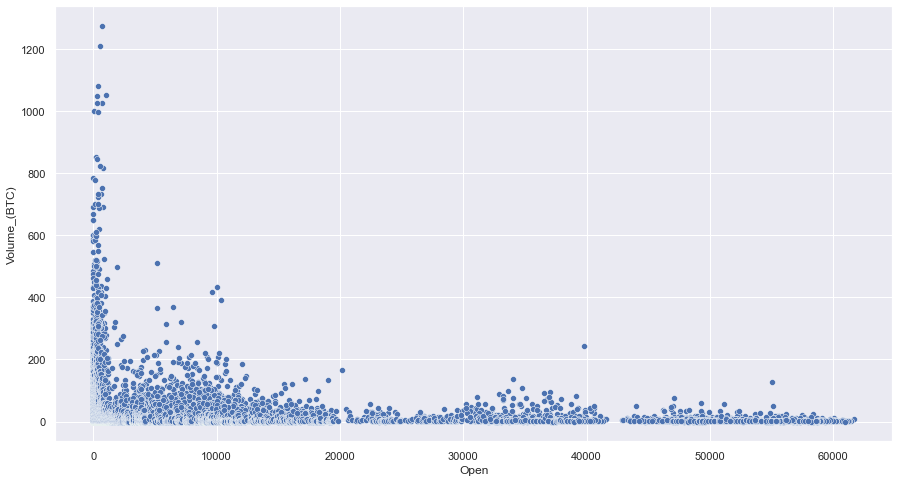

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)}) 
sns.scatterplot(data=df_1hour[df_1hour["Volume_(BTC)"]<1500].iloc[:], x="Open", y="Volume_(BTC)") #There is only 1 outlier after 1500, so we zoom to get a better grasp of the graph

### Histograms

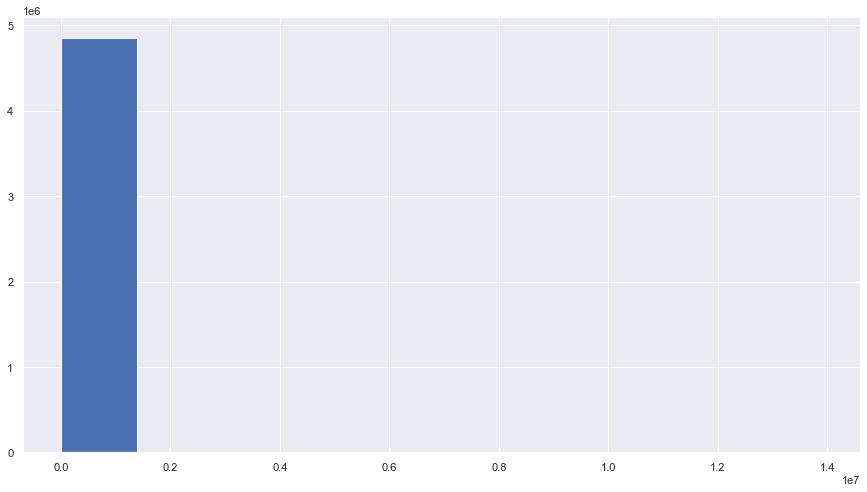

In [ ]:
plt.hist(x=df_nn["Volume_(Currency)"], bins=10)
plt.show()

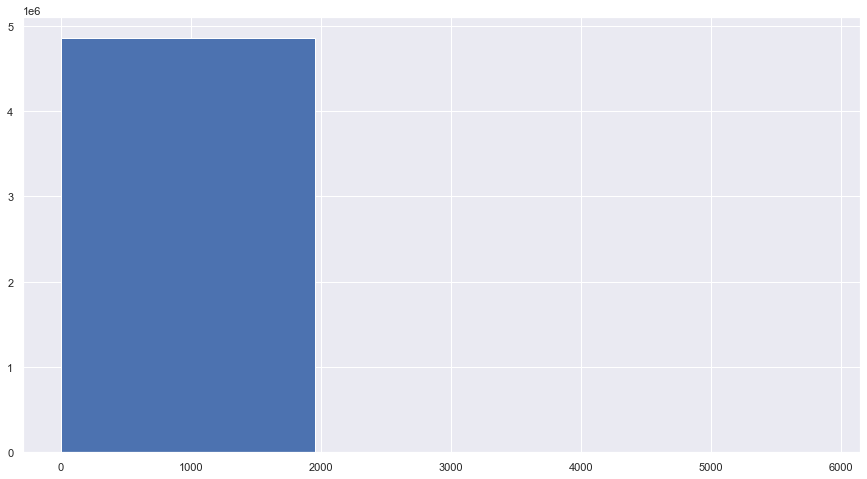

In [ ]:
plt.hist(x=df_nn["Volume_(BTC)"], bins=3)
plt.show()

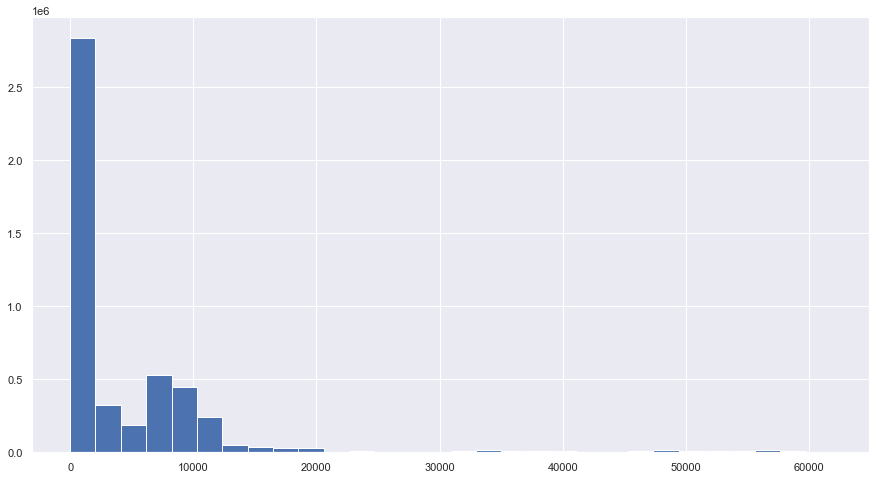

In [ ]:
plt.hist(x=df_nn["Open"], bins=30)
plt.show()

# Actual Implementation

- We first will begin analyzing news using NLP and getting some sentiments analysis
    -  We will start Using BERT in a Branch